In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv(r"../data/dataset/dataset.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
data.loc[data["Category"]=="spam","Category",] = 0
data.loc[data["Category"]=="ham","Category",] = 1

In [5]:
data['Category'].value_counts()

Category
1    4825
0     747
Name: count, dtype: int64

In [6]:
X = data['Message']
y = data['Category']

In [7]:
X,y

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                Will Ì_ b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: Message, Length: 5572, dtype: object,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 5567    0
 5568    1
 5569    1
 5570    1
 5571    1
 Name: Category, Length: 5572, dtype: object)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [10]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase = True)

In [11]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [12]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# LOGISTIC REGRESSION

In [13]:
lr = LogisticRegression()
lr.fit(X_train_features, y_train)

lr_train = lr.predict(X_train_features)
lr_test = lr.predict(X_test_features)

lr_train_acc = accuracy_score(y_train, lr_train)
lr_test_acc = accuracy_score(y_test, lr_test)

lr_precision = precision_score(y_test, lr_test)
lr_recall = recall_score(y_test, lr_test)
lr_f1 = f1_score(y_test, lr_test)

print("Logistic Regression:\n")
print("Training Data Accuracy:", lr_train_acc)
print("Testing Data Accuracy :", lr_test_acc)

print("Precision             :", lr_precision)
print("Recall                :", lr_recall)
print("F1 Score              :", lr_f1)

Logistic Regression:

Training Data Accuracy: 0.9692618353152345
Testing Data Accuracy : 0.9524663677130045
Precision             : 0.950592885375494
Recall                : 0.9968911917098445
F1 Score              : 0.9731917046029337


# DECISION TREES

In [14]:
dtrees = DecisionTreeClassifier()
dtrees.fit(X_train_features, y_train)


dt_train = dtrees.predict(X_train_features)
dt_test = dtrees.predict(X_test_features)


dt_train_acc = accuracy_score(y_train, dt_train)
dt_test_acc = accuracy_score(y_test, dt_test)


dt_precision = precision_score(y_test, dt_test)
dt_recall = recall_score(y_test, dt_test)
dt_f1 = f1_score(y_test, dt_test)


print("Decision Tress:\n")
print("Training Data Accuracy:", dt_train_acc)
print("Testing Data Accuracy :", dt_test_acc)

print("Precision             :", dt_precision)
print("Recall                :", dt_recall)
print("F1 Score              :", dt_f1)

Decision Tress:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.968609865470852
Precision             : 0.9774127310061602
Recall                : 0.9865284974093265
F1 Score              : 0.9819494584837545


# K NEAREST NEIGHBORS

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train_features,y_train)

knn_train = knn.predict(X_train_features)
knn_test = knn.predict(X_test_features)


knn_train_acc = accuracy_score(y_train, knn_train)
knn_test_acc = accuracy_score(y_test, knn_test)


knn_precision = precision_score(y_test, knn_test)
knn_recall = recall_score(y_test, knn_test)
knn_f1 = f1_score(y_test, knn_test)


print("K Nearest Neighbors:\n")
print("Training Data Accuracy:", knn_train_acc)
print("Testing Data Accuracy :", knn_test_acc)

print("Precision             :", knn_precision)
print("Recall                :", knn_recall)
print("F1 Score              :", knn_f1)

K Nearest Neighbors:

Training Data Accuracy: 0.9158626879066637
Testing Data Accuracy : 0.9130044843049328
Precision             : 0.908662900188324
Recall                : 1.0
F1 Score              : 0.9521460286137149


# RANDOM FOREST

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train_features,y_train)

rf_train = rf.predict(X_train_features)
rf_test = rf.predict(X_test_features)


rf_train_acc = accuracy_score(y_train, rf_train)
rf_test_acc = accuracy_score(y_test, rf_test)


rf_precision = precision_score(y_test, rf_test)
rf_recall = recall_score(y_test, rf_test)
rf_f1 = f1_score(y_test, rf_test)


print("Random Forest:\n")
print("Training Data Accuracy:", rf_train_acc)
print("Testing Data Accuracy :", rf_test_acc)   
           
print("Precision             :", rf_precision)
print("Recall                :", rf_recall)
print("F1 Score              :", rf_f1)

Random Forest:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9766816143497757
Precision             : 0.9756838905775076
Recall                : 0.9979274611398964
F1 Score              : 0.9866803278688525


# STACKING MODEL

In [17]:
estimators = [('lr',lr),('dtree', dtrees),('knn',knn),('rf',rf)]
stack = StackingClassifier(estimators=estimators, final_estimator=SVC(kernel='linear'))
stack.fit(X_train_features, y_train)

stack_train = stack.predict(X_train_features)
stack_test = stack.predict(X_test_features)


stack_train_acc = accuracy_score(y_train, stack_train)
stack_test_acc = accuracy_score(y_test, stack_test)


stack_precision = precision_score(y_test, stack_test)
stack_recall = recall_score(y_test, stack_test)
stack_f1 = f1_score(y_test, stack_test)


print("Stacking Classifier:\n")
print("Training Data Accuracy:", stack_train_acc)
print("Testing Data Accuracy :", stack_test_acc)   
           
print("Precision             :", stack_precision)
print("Recall                :", stack_recall)
print("F1 Score              :", stack_f1)

Stacking Classifier:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9829596412556054
Precision             : 0.983640081799591
Recall                : 0.9968911917098445
F1 Score              : 0.9902213072568193


In [23]:
feature_extraction

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word or character n-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21 Since v0.21, if ``input`` is ``'filename'`` or ``'file'``, the data is first read from the file and then passed to the given callable analyzer.",'word'
,"stop_words stop_words: {'english'}, list, default=NoneIf a string, it is passed to _check_stop_list and the appropriate stoplist is returned. 'english' is currently the only supported stringvalue.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",'english'
,"token_pattern token_pattern: str, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp selects tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentn-grams to be extracted. All values of n such that min_n <= n <= max_nwill be used. For example an ``ngram_range`` of ``(1, 1)`` means onlyunigrams, ``(1, 2)`` means unigrams and bigrams, and ``(2, 2)`` meansonly bigrams.Only applies if ``analyzer`` is not callable.

In [22]:
stack

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.The type of estimator is generally expected to be a classifier.However, one can pass a regressor for some use case (e.g. ordinalregression).","[('lr', ...), ('dtree', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA classifier which will be used to combine the base estimators.The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`.",SVC(kernel='linear')
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",None
,"stack_method stack_method: {'auto', 'predict_proba', 'decision_function', 'predict'}, default='auto'Methods called for each base estimator. It can be:* if 'auto', it will try to invoke, for each estimator, `'predict_proba'`, `'decision_function'` or `'predict'` in that order.* otherwise, one of `'predict_proba'`, `'decision_function'` or `'predict'`. If the method is not implemented by the estimator, it will raise an error.",'auto'
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inv

# Metric Visualization

In [18]:
train_acc_list = {"LR":lr_train_acc,
                  "DT":dt_train_acc,
                  "KNN":knn_train_acc,
                  "RF":rf_train_acc,
                  "STACK":stack_train_acc}

test_acc_list = {"LR":lr_test_acc,
                  "DT":dt_test_acc,
                  "KNN":knn_test_acc,
                  "RF":rf_test_acc,
                  "STACK":stack_test_acc}

precision_list = {"LR":lr_precision,
                  "DT":dt_precision,
                  "KNN":knn_precision,
                  "RF":rf_precision,
                  "STACK":stack_precision}

recall_list = {"LR":lr_recall,
               "DT":dt_recall,
               "KNN":knn_recall,
               "RF":rf_recall,
               "STACK":stack_recall}

f1_list = {"LR":lr_f1,
               "DT":dt_f1,
               "KNN":knn_f1,
               "RF":rf_f1,
               "STACK":stack_f1}

In [19]:
a1 =  pd.DataFrame.from_dict(train_acc_list, orient = 'index', columns = ["Traning Accuracy"])
a2 =  pd.DataFrame.from_dict(test_acc_list, orient = 'index', columns = ["Testing Accuracy"])
a3 =  pd.DataFrame.from_dict(precision_list, orient = 'index', columns = ["Precision Score"])
a4 =  pd.DataFrame.from_dict(recall_list, orient = 'index', columns = ["Recall Score"])
a5 =  pd.DataFrame.from_dict(f1_list, orient = 'index', columns = ["F1 Score"])

org = pd.concat([a1, a2, a3, a4, a5], axis = 1)
org

,Traning Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score
LR,0.969262,0.952466,0.950593,0.996891,0.973192
DT,1.000000,0.968610,0.977413,0.986528,0.981949
KNN,0.915863,0.913004,0.908663,1.000000,0.952146
RF,1.000000,0.976682,0.975684,0.997927,0.986680
STACK,1.000000,0.982960,0.983640,0.996891,0.990221


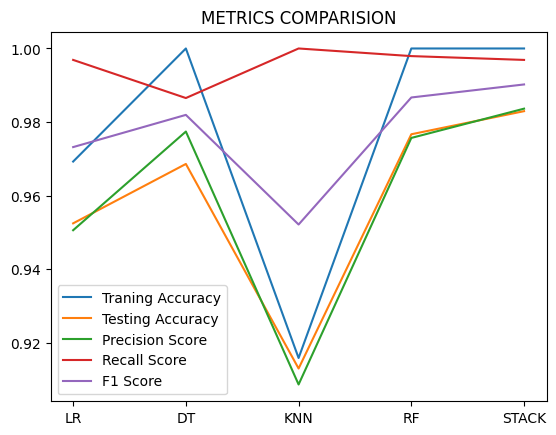

In [20]:
import matplotlib.pyplot as plt

alg = ['LR','DT','KNN','RF','STACK']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
plt.plot(alg,a5)
legend = ['Traning Accuracy', 'Testing Accuracy', 'Precision Score', 'Recall Score', 'F1 Score']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()

In [21]:
input_mail = "Hi this is Hritic"

input_mail = feature_extraction.transform([input_mail])

prediction = stack.predict(input_mail)

if (prediction==0):
    print("Spam")
else:
    print("Ham")

Ham


In [24]:
import pickle
import os

# Define output directory
output_dir = r"C:\Users\sai\Desktop\ML_AI\project\spam_detect\data"
models_dir = os.path.join(output_dir, "models")

# Create the directory if it doesn't exist
os.makedirs(models_dir, exist_ok=True)

# Save the vectorizer
vectorizer_path = os.path.join(models_dir, "vectorizer.pkl")
with open(vectorizer_path, 'wb') as f:
    pickle.dump(feature_extraction, f)

print(f"Vectorizer saved successfully at: {vectorizer_path}")

Vectorizer saved successfully at: C:\Users\sai\Desktop\ML_AI\project\spam_detect\data\models\vectorizer.pkl


In [25]:
import pickle
import os

# Define output directory
output_dir = r"C:\Users\sai\Desktop\ML_AI\project\spam_detect\data"
models_dir = os.path.join(output_dir, "models")

# Create the directory if it doesn't exist
os.makedirs(models_dir, exist_ok=True)

# Save the vectorizer
vectorizer_path = os.path.join(models_dir, "stack_model.pkl")
with open(vectorizer_path, 'wb') as f:
    pickle.dump(stack, f)

print(f"Vectorizer saved successfully at: {vectorizer_path}")

Vectorizer saved successfully at: C:\Users\sai\Desktop\ML_AI\project\spam_detect\data\models\stack_model.pkl
